# Importing Libraries

In [1]:
import keras
import PIL

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation, BatchNormalization

Using TensorFlow backend.
C:\Users\Prateek\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Prateek\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Prateek\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Prateek\anaconda3\lib\site-packages\tensorflow\python\framework\d

# Defining Model Architecture

In [2]:
def model_builder():
    model = Sequential()
    
    model.add(Conv2D(32, (3,3) ,input_shape=(200, 200, 1), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Convolution
    model.add(MaxPooling2D(pool_size= (2,2), strides=2)) #Pooling
    model.add(Dropout(0.05))
    
    model.add(Flatten())
    model.add(Dropout(0.6))
    
    model.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    model.summary()
    
    return model

# Initializing Callbacks

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=6)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

# Loading Training and Validation Images

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255, 
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    validation_split=0.20)    

training_dataset = image_generator.flow_from_directory(directory='Data/', 
                                                       target_size=(200,200),
                                                       color_mode='grayscale',
                                                       batch_size = 32, 
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/', 
                                                         target_size=(200,200),
                                                         color_mode='grayscale',
                                                         batch_size = 32, 
                                                         subset="validation",
                                                         class_mode='categorical')

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


# Visualizing Dataset

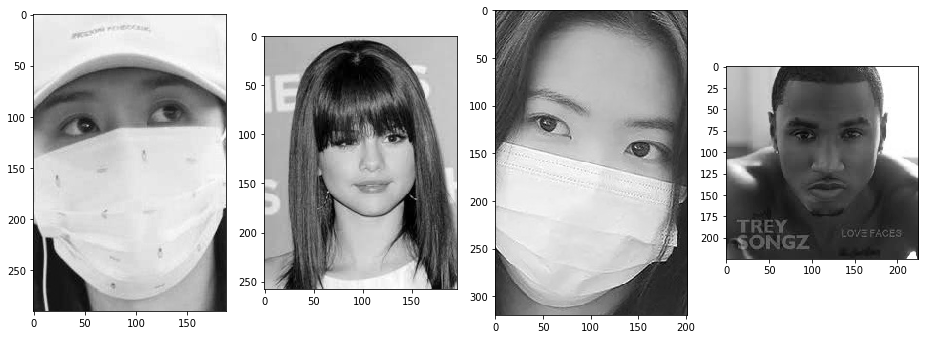

In [5]:
import cv2
from matplotlib import pyplot as plt

image1 = cv2.imread('Data/with_mask/126.jpg' ,1)
image2 = cv2.imread('Data/with_mask/88.jpg', 1)
image3 = cv2.imread('Data/without_mask/142.jpg', 1)
image4 = cv2.imread('Data/without_mask/67.jpg' , 1)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,3)
ax3 = fig.add_subplot(1,5,2)
ax4 = fig.add_subplot(1,5,4)

ax1.imshow(image1, cmap='gray')
ax2.imshow(image2, cmap='gray')
ax3.imshow(image3, cmap='gray')
ax4.imshow(image4, cmap='gray')

plt.show()

In [6]:
model = model_builder()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)      

# Fitting Model

In [7]:
history = model.fit_generator(training_dataset, 
                              steps_per_epoch=2067//32, 
                              epochs=15,
                              validation_data=validation_dataset, 
                              validation_steps=766//32,
                              callbacks=callbacks)


Epoch 1/15
48/64 [=====================>........] - ETA: 17s - loss: 0.6580 - accuracy: 0.6074

C:\Users\Prateek\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


64/64 [==============================] - 76s 1s/step - loss: 0.6264 - accuracy: 0.6407 - val_loss: 0.5271 - val_accuracy: 0.7024
Epoch 2/15
64/64 [==============================] - 48s 756ms/step - loss: 0.4724 - accuracy: 0.7729 - val_loss: 0.6176 - val_accuracy: 0.7343
Epoch 3/15
64/64 [==============================] - 40s 626ms/step - loss: 0.4343 - accuracy: 0.7885 - val_loss: 0.3343 - val_accuracy: 0.8229
Epoch 4/15
64/64 [==============================] - 40s 624ms/step - loss: 0.3581 - accuracy: 0.8330 - val_loss: 0.2584 - val_accuracy: 0.8719
Epoch 5/15
64/64 [==============================] - 40s 623ms/step - loss: 0.2960 - accuracy: 0.8703 - val_loss: 0.2036 - val_accuracy: 0.8951
Epoch 6/15
64/64 [==============================] - 41s 634ms/step - loss: 0.2691 - accuracy: 0.8825 - val_loss: 0.4235 - val_accuracy: 0.8815

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
Epoch 7/15
64/64 [==============================] - 42s 649ms/step - loss: 

In [8]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

# Plotting Accuracy and Loss

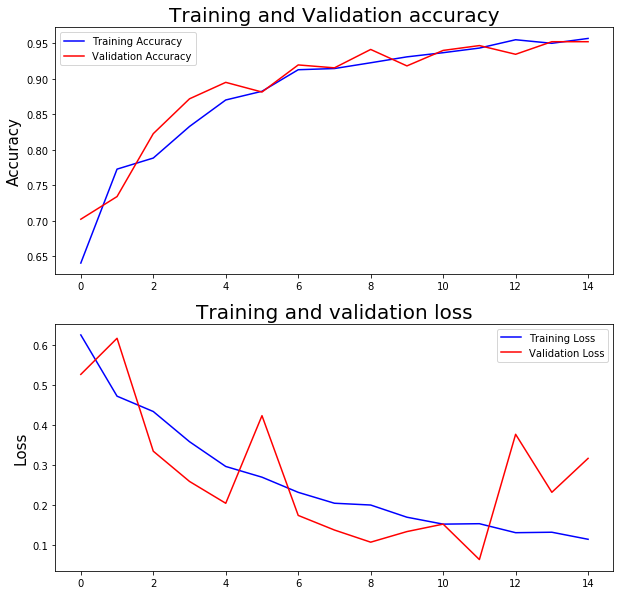

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

# Accuracy of Model

In [10]:
print("Accuracy Score:" , round(accuracy[-1]*100))

Accuracy Score: 96.0


# Saving Model

In [11]:
model.save('Model')

AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'TFOptimizer'